In [29]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

data_dir = '/Users/iaincarmichael/data/courtlistener/'

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_rel, ttest_ind
import cPickle as pickle
import copy 

# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')
from results import *



# which network to download data for
network_name = 'federal' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'
results_dir = subnet_dir + 'results/'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

/Users/iaincarmichael/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  if __name__ == '__main__':


# results

In [3]:
name = 'federal_test'
sort_path = results_dir + 'sort/%s/rankloss_sort.p' % name
rankloss_sort = pickle.load(open(sort_path, "rb"))

rankloss = {'sort': rankloss_sort}

In [25]:
rankloss['sort']['MRS'].columns

Index([u'indegree', u'outdegree', u'degree', u'd_pagerank', u'u_pagerank',
       u'authorities', u'hubs', u'u_eigen', u'recentcite_1', u'recentcite_2',
       u'recentcite_3', u'recentcite_4', u'recentcite_5', u'recentcite_6',
       u'recentcite_7', u'recentcite_8', u'recentcite_9', u'recentcite_10',
       u'recentcite_15', u'recentcite_20', u'recentcite_25', u'recentcite_30',
       u'recentcite_35', u'recentcite_40', u'age', u'similarity'],
      dtype='object')

In [26]:
dir_time_agnostic_metrics = ['indegree', 'outdegree',
                             'd_pagerank', 'authorities']

In [35]:
all_dir_metrics = copy.copy(dir_time_agnostic_metrics)

# all_dir_metrics += ['polyrank_2', 'polyrank_5', 'polyrank_10']
# all_dir_metrics += ['citerank_2', 'citerank_5', 'citerank_10', 'citerank_50']
all_dir_metrics += ['recentcite_2' ,'recentcite_5', 'recentcite_10', 'recentcite_20']


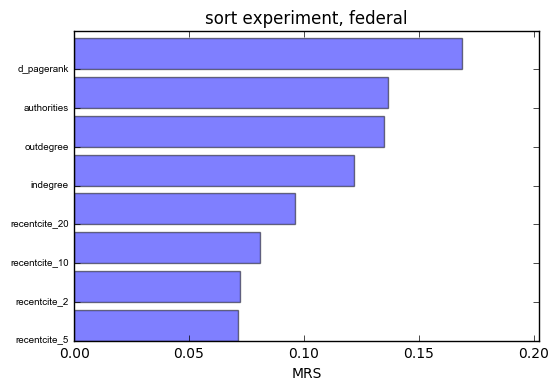

In [36]:
exper='sort'

metric = 'MRS'

plot_scores(rankloss[exper][metric][all_dir_metrics], exper=exper, metric=metric, network_name=network_name)

In [17]:
to_compare = ['indegree', 'authorities']
exper = 'sort'
metric = 'MRS'
data = rankloss[exper][metric][to_compare]

print '%s vs. %s' % ( to_compare[0], to_compare[1])
print '%s experiment, %s' % (exper,metric)
print 'two sided t-test for equal means' 
print
print 'dependent paired samples'
print ttest_rel(data[to_compare[0]], data[to_compare[1]])

indegree vs. authorities
sort experiment, MRS
two sided t-test for equal means

dependent paired samples
Ttest_relResult(statistic=-3.790380699438046, pvalue=0.00015942185821828748)


# paper figures

In [12]:
dir_time_agnostic_metrics = ['indegree', 'outdegree',
                             'd_pagerank', 'authorities', 'hubs']

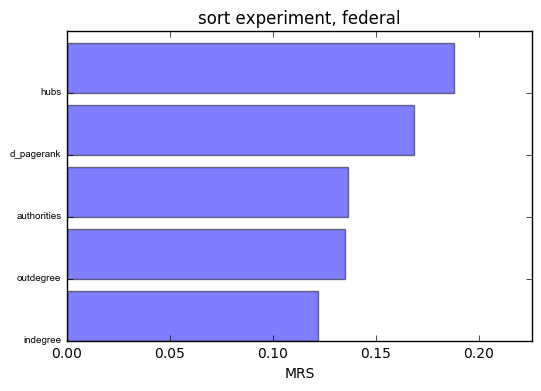

In [13]:
plot_scores(rankloss[exper][metric][dir_time_agnostic_metrics], exper=exper, metric=metric, network_name=network_name)